In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings ('ignore')

df=pd.read_csv('insurance_df.csv',na_values=-1)
cut=df.iloc[0:50000,:]
cut.isnull().sum()
y=cut['target']
cut.drop(columns='target',inplace=True)
df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1.0,4,0.0,0.0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1.0,3,1.0,0.0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1.0,4,0.0,0.0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1.0,3,1.0,0.0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1.0,2,0.0,0.0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


In [16]:
cut.shape
cut.describe()
cut.dtypes
cut.columns
cut.head()
cut.tail()
cut.count()
cut.isnull().sum(axis=0)
cut.size

2900000

In [3]:
missing_values=pd.DataFrame({'columns':cut.columns,'values':cut.isnull().sum(),
                             'percentage':cut.isnull().sum()/cut.shape[0]*100})
missing_values.sort_values(by='percentage',ascending=False)
cols_to_drop=list(missing_values[missing_values['percentage']>40]['columns'])
cut.drop(columns=cols_to_drop,inplace=True)

In [4]:
cut.drop(columns=cols_to_drop,inplace=True)
cols_with_no_na=list(missing_values[missing_values['percentage']==0]['columns'])
a=[]
for col in cols_with_no_na:
    if len(np.unique(cut[col]))==1 or len(np.unique(cut[col]))==cut.shape[0]:
        a.append(col)
cut.drop(columns=a,inplace=True)
cut.shape

(50000, 55)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cut, y, test_size=0.3, random_state=42)
X_train.shape
cat_cols=[col for col in X_train.columns if 'cat' in col or 'bin' in col ]
num_cols=[col for col in X_train.columns if 'cat' not in col or 'bin' not in col ]
num_cols
for col in num_cols:
    X_train[col]=X_train[col].fillna(X_train[col].mean())
    X_test[col]=X_test[col].fillna(X_train[col].mean())
for col in cat_cols:
    X_train[col]=X_train[col].fillna(X_train[col].mode()[0]).astype('object')
    X_test[col]=X_test[col].fillna(X_train[col].mode()[0]).astype('object')


In [7]:
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (67442, 55)
After OverSampling, the shape of train_y: (67442,) 

After OverSampling, counts of label '1': 33721
After OverSampling, counts of label '0': 33721


In [8]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [9]:
label=LabelEncoderExt()
for col in cat_cols:
    label.fit(X_train[col])
    X_train_res[col]=label.transform(X_train_res[col]).astype('object')
    X_test[col]=label.transform(X_test[col]).astype('object')

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve
regression=LogisticRegression()
regression.fit(X_train_res,y_train_res)
regression_predict=regression.predict(X_test)
confusion_matrix(y_test,regression_predict)
print('accuarcy_score',accuracy_score(y_test,regression_predict))
print('recall',recall_score(y_test,regression_predict))

accuarcy_score 0.6637333333333333
recall 0.37906137184115524


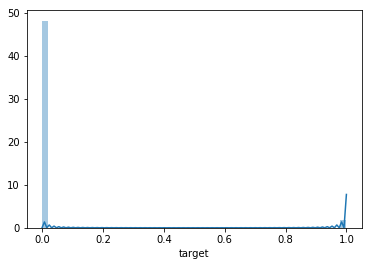

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
#sns.distplot(cut['target'])
sns.distplot(y)